# ep4 stock specific optimization of trading strategy parameters

In this episode, I would like to perform parameter optimization for all stocks.  First I would like to package the functions built in previous episodes, namely, `read_stock`, `buy_sig`, `sell_sig`, `proc_stock` and `paper_trade`.  Note that `paper_trade` imported here is in fact a lite version of `paper_trade` in the sense that it does not print the intermediate trading steps and the graph showing the time-evolution of the net value.  It appears that all I need to do is define and implement these functions in a file, let's call it `my_stock.py`, and use `from my_stock import read_stock`.  Note that in the line of code for importing, the extension `.py` is omitted.

In [14]:
import pandas as pd
from my_stock import read_stock,buy_sig,sell_sig,proc_stock,paper_trade

df_SP500 = pd.read_csv('SP500_simple_bdsr_res.csv')
df_SP500.drop(['Strategy Gain %','Diff Gain %','Unnamed: 0'],axis=1,inplace=True)
df_SP500.head(10)

,Symbol,Security,GICSSector,GICS Sub-Industry,Benchmark Gain %
0,MMM,3M Company,Industrials,Industrial Conglomerates,2.0
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment,32.0
2,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals,40.0
3,ABMD,ABIOMED Inc,Health Care,Health Care Equipment,40.0
4,ACN,Accenture plc,Information Technology,IT Consulting & Other Services,24.0
5,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment,38.0
6,ADBE,Adobe Inc.,Information Technology,Application Software,62.0
7,AMD,Advanced Micro Devices Inc,Information Technology,Semiconductors,173.0
8,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail,-7.0
9,AES,AES Corp,Utilities,Independent Power Producers & Energy Traders,28.0


Yes, it appears that this approach works.

The code block below performs stock-by-stock optimization of trading strategy parameters.

In [15]:
def opti(symbol):
    d = range(2,11)
    r = range(2,11)
    df0 = read_stock(symbol)
    res = []
    for di in d:
        for ri in r:
            df = df0.copy()
            df = proc_stock(df,20,di,ri)
            benchmark_gain,strategy_gain = paper_trade(df,1000000,5,False,False)
            res.append([di,ri,strategy_gain])
    res = sorted(res,key=lambda x: x[2],reverse=True)
    return res[0]

ls_opti = list(df_SP500['Symbol'].apply(opti))

In [17]:
df_opti = pd.DataFrame(ls_opti,columns=['d','r','Max. Strategy Gain %'])
df_SP500 = pd.concat([df_SP500,df_opti],axis=1)
df_SP500.head(10)

,Symbol,Security,GICSSector,GICS Sub-Industry,Benchmark Gain %,d,r,Max. Strategy Gain %
0,MMM,3M Company,Industrials,Industrial Conglomerates,2.0,5,3,15
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment,32.0,5,9,21
2,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals,40.0,2,5,54
3,ABMD,ABIOMED Inc,Health Care,Health Care Equipment,40.0,4,9,76
4,ACN,Accenture plc,Information Technology,IT Consulting & Other Services,24.0,2,10,34
5,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment,38.0,3,6,43
6,ADBE,Adobe Inc.,Information Technology,Application Software,62.0,2,8,66
7,AMD,Advanced Micro Devices Inc,Information Technology,Semiconductors,173.0,2,5,64
8,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail,-7.0,7,5,2
9,AES,AES Corp,Utilities,Independent Power Producers & Energy Traders,28.0,2,10,49


In [18]:
df_SP500.to_csv('opti.csv',header=True,index=False)

I would like to inspect whether the max. strategy gain % and the benchmark gain % correlate.  This analysis is presented in the code block below.

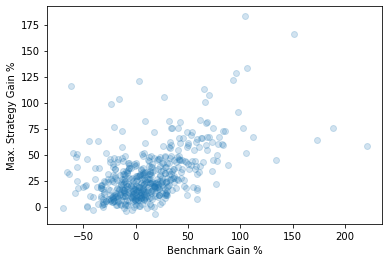

In [19]:
import matplotlib.pyplot as plt
plt.scatter(df_SP500['Benchmark Gain %'],df_SP500['Max. Strategy Gain %'],alpha=0.2)
plt.xlabel('Benchmark Gain %')
plt.ylabel('Max. Strategy Gain %')
plt.show()